In [2]:
# import libraries

import pandas as pd
# use the following to suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

# libraries for frequent pattern mining
! pip install mlxtend
import mlxtend
from mlxtend.frequent_patterns import apriori

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# for ignore the warning
import warnings
warnings.filterwarnings('ignore')

# generat the data set

at the begining i merged the first two datasets(historical_transactions and new_merchant_transactions) with a traditional way because they have the same features and assign the new data frame on merged_df1
after that i checked the common features between the merged_df1 and the merchants data, it was found that there were 7 common features between them. therfore i performed inner join and assigned the dataframe on merged_df2
finally i checked the common features between the merged_df2 and userscore and it was found only one common feature between them. therefore i performed inner join and assigned the dataframe on df

In [ ]:
# load the 4 data files
df1 = pd.read_csv('historical_transactions.csv')  # load historical_transactions file
df2 = pd.read_csv('new_merchant_transactions.csv')  # load new_merchant_transactions file
df3 = pd.read_csv('merchants.csv')  # load merchants file
df4 = pd.read_csv('userscore.csv')  # load userscore file

# print the dimension for each data frame 
df1.shape
df2.shape
df3.shape
df4.shape

# print the first five rows for each data frame
df1.head()
df2.head()
df3.head()
df4.head()

In [4]:
# Concatenate the two dataframes (historical_transactions and new_merchant_transactions) vertically because the have the same features 
merged_df1 = pd.concat([df1, df2])

# Reset the index of the merged dataframe
merged_df1 = merged_df1.reset_index(drop=True)

# check the dimension after merged the two datasets
merged_df1.shape

# print the first five rows after merging to check the columns name 
merged_df1.head()

(31075392, 14)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703,2017-06-25 15:33:07,1.000,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733,2017-07-15 12:10:45,1.000,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720,2017-08-09 22:04:29,1.000,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735,2017-09-02 10:06:26,1.000,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.723,2017-03-10 01:14:19,1.000,16,37


In [5]:
# Find the common columns between the two dataframes (merged_df1 and merchants)
common_cols = list(set(merged_df1.columns).intersection(df3.columns))

# Print the common columns
print(common_cols)

# Perform an inner join on the two dataframes (merged_df1 and merchants)
merged_df2 = pd.merge(merged_df1, df3, on= common_cols)

# print the shape after performing inner join
merged_df2.shape

# print the first five rows after performing the inner join
merged_df2.head()

['category_2', 'merchant_id', 'state_id', 'category_1', 'subsector_id', 'merchant_category_id', 'city_id']


(20289044, 29)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703,...,1.080,1.082,3,1.140,1.114,6,1.190,1.157,12,Y
1,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.723,...,1.080,1.082,3,1.140,1.114,6,1.190,1.157,12,Y
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.742,...,1.080,1.082,3,1.140,1.114,6,1.190,1.157,12,Y
3,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.745,...,1.080,1.082,3,1.140,1.114,6,1.190,1.157,12,Y
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.738,...,1.080,1.082,3,1.140,1.114,6,1.190,1.157,12,Y


In [6]:
# Find the common columns between the two dataframes (merged_df2 and userscore)
common_cols = list(set(merged_df2.columns).intersection(df4.columns))

# Print the common columns
print(common_cols)

# Perform an inner join on the two dataframes (merged_df2 and userscore)
df = pd.merge(merged_df2, df4, on= common_cols)

# print the shape after performing inner join
df.shape

# print the first five rows after performing the inner join
df.head()

['card_id']


(12563652, 34)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
0,Y,C_ID_d244d8976d,88,N,0,A,80,M_ID_e020e9b302,-4,-0.713,...,6,1.190,1.157,12,Y,Aug-17,3,2,1,-0.169
1,Y,C_ID_d244d8976d,69,N,0,A,278,M_ID_f86439cec0,0,-0.700,...,6,1.130,1.126,12,Y,Aug-17,3,2,1,-0.169
2,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,-5,-0.684,...,6,1.000,1.025,12,Y,Aug-17,3,2,1,-0.169
3,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,0,-0.666,...,6,1.000,1.025,12,Y,Aug-17,3,2,1,-0.169
4,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,-5,-0.696,...,6,1.000,1.025,12,Y,Aug-17,3,2,1,-0.169


In [7]:
# print some information about the data to check the datatype for each colmns
df.info()

# illustrate some statistics about the data
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563652 entries, 0 to 12563651
Data columns (total 34 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   card_id                      object 
 2   city_id                      int64  
 3   category_1                   object 
 4   installments                 int64  
 5   category_3                   object 
 6   merchant_category_id         int64  
 7   merchant_id                  object 
 8   month_lag                    int64  
 9   purchase_amount              float64
 10  purchase_date                object 
 11  category_2                   float64
 12  state_id                     int64  
 13  subsector_id                 int64  
 14  merchant_group_id            int64  
 15  numerical_1                  float64
 16  numerical_2                  float64
 17  most_recent_sales_range      object 
 18  most_recent_purchases_range  object 
 19

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
count,12563652,12563652,12563652.000,12563652,12563652.000,12476244,12563652.000,12563652,12563652.000,12563652.000,...,12563652.000,12557846.000,12563652.000,12563652.000,12563652,12563652,12563652.000,12563652.000,12563652.000,12563652.000
unique,2,193619,NaN,2,NaN,3,NaN,207449,NaN,NaN,...,NaN,NaN,NaN,NaN,2,75,NaN,NaN,NaN,NaN
top,Y,C_ID_0cd2ce025c,NaN,N,NaN,A,NaN,M_ID_e5374dabc0,NaN,NaN,...,NaN,NaN,NaN,NaN,Y,Jan-17,NaN,NaN,NaN,NaN
freq,11577679,2548,NaN,11565790,NaN,6529318,NaN,267515,NaN,NaN,...,NaN,NaN,NaN,NaN,7251100,805024,NaN,NaN,NaN,NaN
mean,NaN,NaN,122.571,NaN,0.640,NaN,461.452,NaN,-4.137,0.246,...,5.997,67.264,inf,11.933,NaN,NaN,3.099,1.733,0.541,-0.465
std,NaN,NaN,96.004,NaN,2.518,NaN,240.917,NaN,3.773,1701.168,...,0.095,7522.398,NaN,0.527,NaN,NaN,1.267,0.714,0.498,3.606
min,NaN,NaN,-1.000,NaN,-1.000,NaN,2.000,NaN,-13.000,-0.747,...,1.000,-2.320,0.098,1.000,NaN,NaN,1.000,1.000,0.000,-33.219
25%,NaN,NaN,53.000,NaN,0.000,NaN,278.000,NaN,-7.000,-0.721,...,6.000,0.950,0.972,12.000,NaN,NaN,2.000,1.000,0.000,-0.807
50%,NaN,NaN,88.000,NaN,0.000,NaN,437.000,NaN,-3.000,-0.690,...,6.000,1.040,1.052,12.000,NaN,NaN,3.000,2.000,1.000,-0.091
75%,NaN,NaN,189.000,NaN,1.000,NaN,705.000,NaN,-1.000,-0.609,...,6.000,1.160,1.154,12.000,NaN,NaN,4.000,2.000,1.000,0.534


In [8]:
# number of columns that contains null values 
sum(df.isna().any())

# display number of nulls in each column
df.isna().sum()

5

authorized_flag                      0
card_id                              0
city_id                              0
category_1                           0
installments                         0
category_3                       87408
merchant_category_id                 0
merchant_id                          0
month_lag                            0
purchase_amount                      0
purchase_date                        0
category_2                     1186777
state_id                             0
subsector_id                         0
merchant_group_id                    0
numerical_1                          0
numerical_2                          0
most_recent_sales_range              0
most_recent_purchases_range          0
avg_sales_lag3                    5806
avg_purchases_lag3                   0
active_months_lag3                   0
avg_sales_lag6                    5806
avg_purchases_lag6                   0
active_months_lag6                   0
avg_sales_lag12          

In [9]:
# print the shape befor dropping the missing values 
df.shape

# drop all missing values 
df = df.dropna()

# print the shape after dropping the missing values
df.shape

(12563652, 34)

(11292220, 34)

In [10]:
# print the first five rows 
df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
0,Y,C_ID_d244d8976d,88,N,0,A,80,M_ID_e020e9b302,-4,-0.713,...,6,1.190,1.157,12,Y,Aug-17,3,2,1,-0.169
1,Y,C_ID_d244d8976d,69,N,0,A,278,M_ID_f86439cec0,0,-0.700,...,6,1.130,1.126,12,Y,Aug-17,3,2,1,-0.169
2,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,-5,-0.684,...,6,1.000,1.025,12,Y,Aug-17,3,2,1,-0.169
3,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,0,-0.666,...,6,1.000,1.025,12,Y,Aug-17,3,2,1,-0.169
4,Y,C_ID_d244d8976d,69,N,0,A,705,M_ID_1f4773aa76,-5,-0.696,...,6,1.000,1.025,12,Y,Aug-17,3,2,1,-0.169


In [11]:
# check features data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11292220 entries, 0 to 12563651
Data columns (total 34 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   card_id                      object 
 2   city_id                      int64  
 3   category_1                   object 
 4   installments                 int64  
 5   category_3                   object 
 6   merchant_category_id         int64  
 7   merchant_id                  object 
 8   month_lag                    int64  
 9   purchase_amount              float64
 10  purchase_date                object 
 11  category_2                   float64
 12  state_id                     int64  
 13  subsector_id                 int64  
 14  merchant_group_id            int64  
 15  numerical_1                  float64
 16  numerical_2                  float64
 17  most_recent_sales_range      object 
 18  most_recent_purchases_range  object 
 19  avg

In [12]:
# chech missing values 
df.isna().sum()

authorized_flag                0
card_id                        0
city_id                        0
category_1                     0
installments                   0
category_3                     0
merchant_category_id           0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
category_2                     0
state_id                       0
subsector_id                   0
merchant_group_id              0
numerical_1                    0
numerical_2                    0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag3                 0
avg_purchases_lag3             0
active_months_lag3             0
avg_sales_lag6                 0
avg_purchases_lag6             0
active_months_lag6             0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
category_4                     0
first_active_month             0
feature_1 

# features generation

the target of this section is to generate a features suitable for our cluster process:

at the first after plotting the correlation among the features i dropped all the features which have high correlation with others and categorical features which will not suitable for clustering because the distance will be measured so we need only numerical feature 

after the first step l had onlu 11 features (card_id, city_id, installments, merchant_id, month_lag, purchase_amount, numerical_1, numerical_2, avg_sales_lag12, avg_purchases_lag12, active_months_lag12) from 34,
and i was starting aggregate the remaing features using card id to generate a suitable features for clustering  
- counts for merchant_id to get the number of merchants which were dealing with each card_id
- sum for installments to get total number of installments for each catd_id
- sum for month_lag to get total number of lag months for each card_id
- count for city_id to get number cities for each card_id
- mean for purchase_amount to get the average purchase amount for each card_id
- mean for avg_sales_lag12, and avg_purchases_lag12 
- min and max for numerical_1 and numerical_2 respectivily
- sum for active_months_lag12 for active_months_lag12

finally after finishing i had a features dataframe with dimensions (183756, 10) and it was ready to enter a kmeans to build our clusters

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

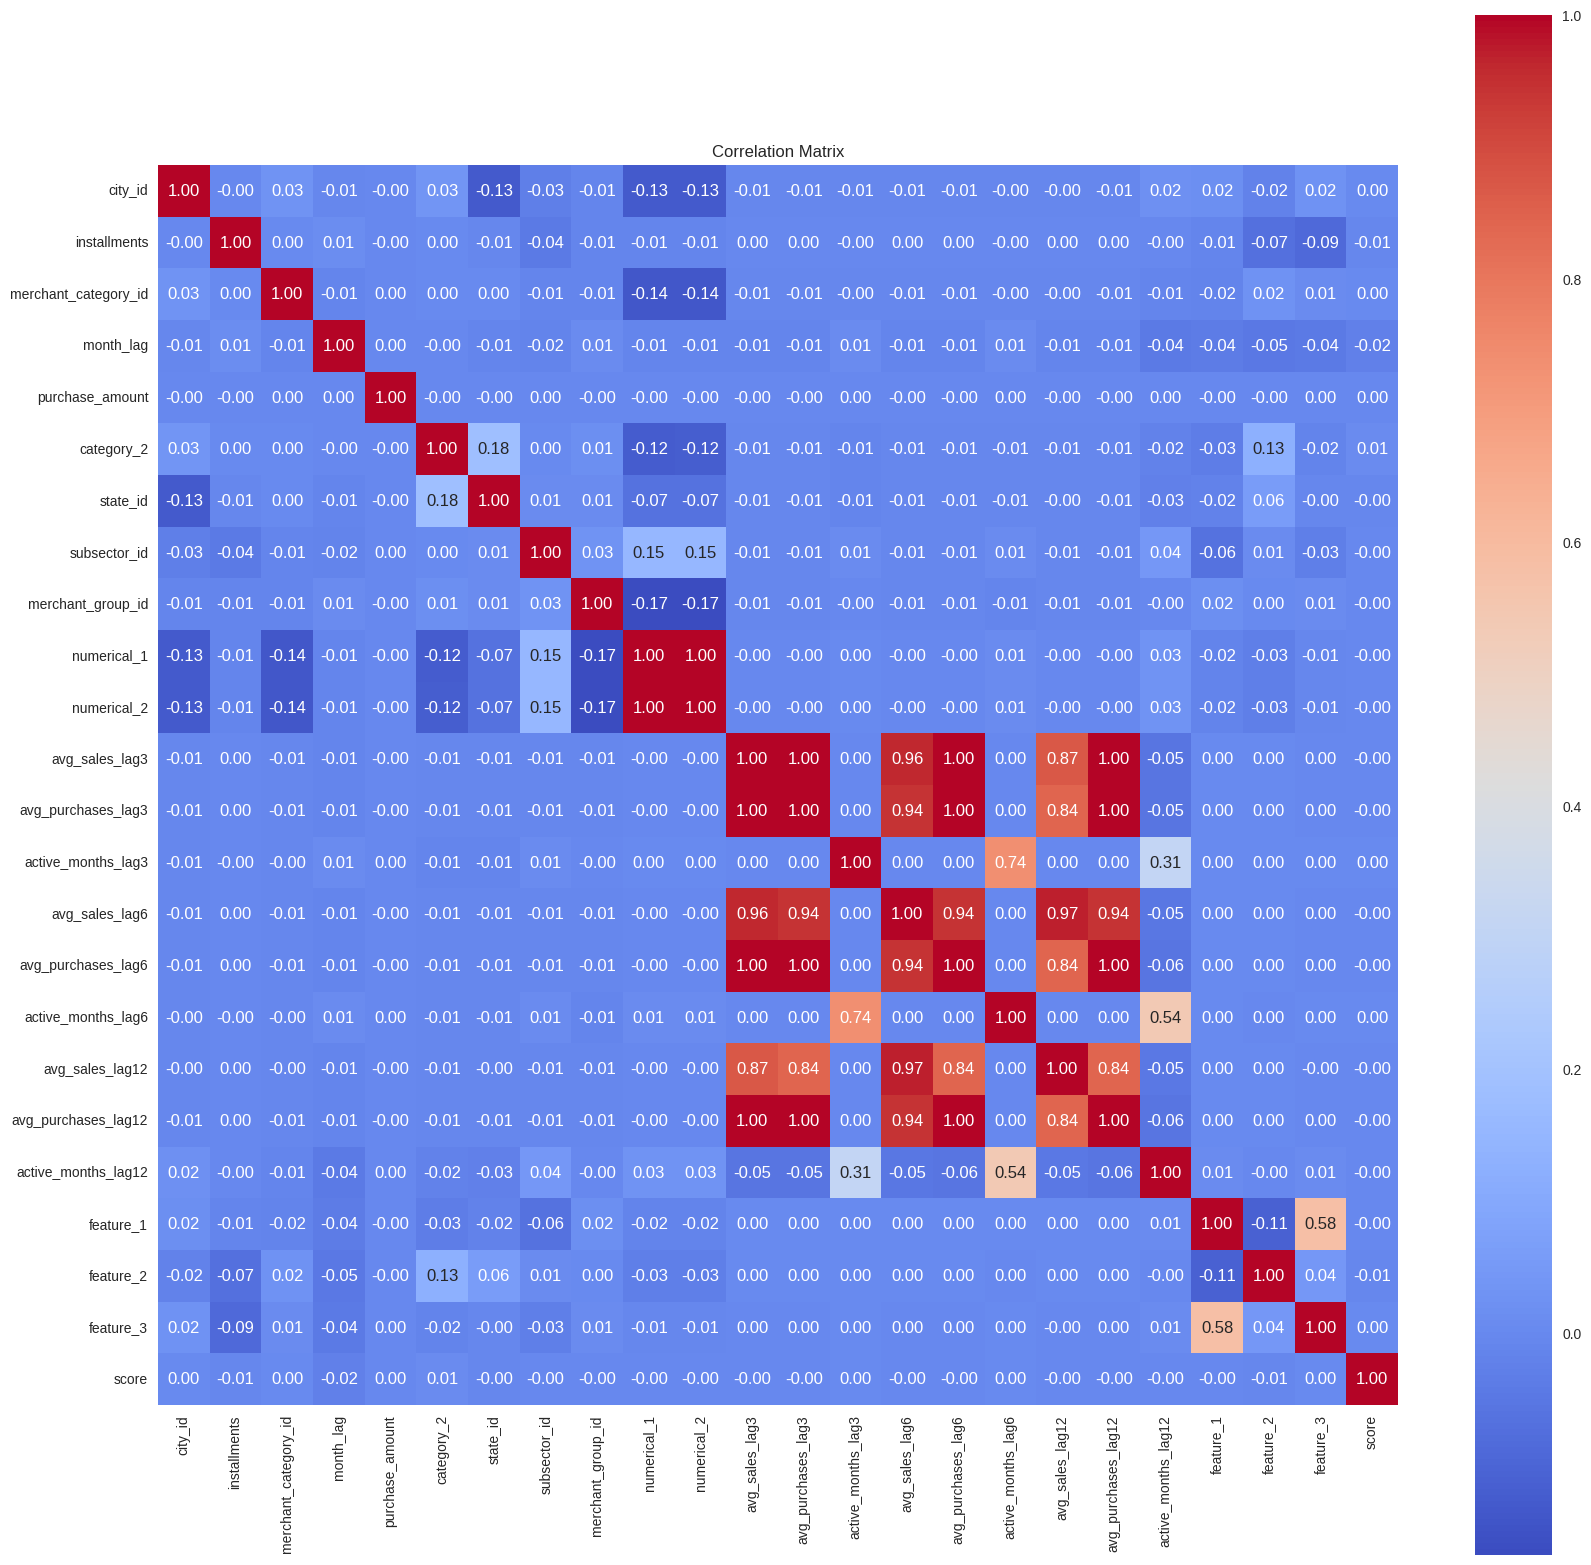

In [14]:
# select the numeric features and prin the correlation
numeric_data = df.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# drop unwanted columns 
data = df.drop(['authorized_flag','purchase_date','most_recent_sales_range','most_recent_purchases_range','avg_sales_lag3',
             'avg_purchases_lag3','active_months_lag3','avg_sales_lag6','avg_purchases_lag6','active_months_lag6',
             'category_4','first_active_month','category_1','category_3','merchant_category_id','category_2',
             'state_id','subsector_id','merchant_group_id','feature_1','feature_2','feature_3','score'],axis=1)

# print dimensions
data.shape
# print the first five rows
data.head()
# check features dtatypes
data.info()

(11292220, 11)

,card_id,city_id,installments,merchant_id,month_lag,purchase_amount,numerical_1,numerical_2,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
0,C_ID_d244d8976d,88,0,M_ID_e020e9b302,-4,-0.713,23.471,23.015,1.190,1.157,12
1,C_ID_d244d8976d,69,0,M_ID_f86439cec0,0,-0.700,117.831,116.889,1.130,1.126,12
2,C_ID_d244d8976d,69,0,M_ID_1f4773aa76,-5,-0.684,3.175,-0.048,1.000,1.025,12
3,C_ID_d244d8976d,69,0,M_ID_1f4773aa76,0,-0.666,3.175,-0.048,1.000,1.025,12
4,C_ID_d244d8976d,69,0,M_ID_1f4773aa76,-5,-0.696,3.175,-0.048,1.000,1.025,12


<class 'pandas.core.frame.DataFrame'>
Index: 11292220 entries, 0 to 12563651
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   card_id              object 
 1   city_id              int64  
 2   installments         int64  
 3   merchant_id          object 
 4   month_lag            int64  
 5   purchase_amount      float64
 6   numerical_1          float64
 7   numerical_2          float64
 8   avg_sales_lag12      float64
 9   avg_purchases_lag12  float64
 10  active_months_lag12  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.0+ GB


In [16]:
# perform aggregations on the features dataframe by card_id
features = data.groupby(['card_id']).agg({'merchant_id': 'count',
                                      'installments': 'sum', 
                                      'month_lag': 'sum', 
                                      'purchase_amount': 'mean', 
                                      'numerical_1': 'min',
                                      'numerical_2': 'max',
                                      'avg_sales_lag12':'mean',
                                      'city_id': 'count',
                                      'avg_purchases_lag12': 'mean',
                                      'active_months_lag12': 'sum'})

In [17]:
# print dimensionn for features dataframe
features.shape
# print the first five rows
features.head()

(183756, 10)

,merchant_id,installments,month_lag,purchase_amount,numerical_1,numerical_2,avg_sales_lag12,city_id,avg_purchases_lag12,active_months_lag12
card_id,,,,,,,,,,
C_ID_00007093c1,17,28,-55,-0.513,-0.057,2.372,1.020,17,0.998,204
C_ID_0001506ef0,55,1,-234,-0.492,-0.057,15.112,1.081,55,1.116,660
C_ID_000183fdda,117,211,-271,-0.559,-0.057,3.294,1.120,117,1.063,1404
C_ID_00027503e2,38,0,-159,-0.741,-0.057,0.845,1.028,38,1.016,456
C_ID_0002c7c2c1,57,0,-168,-0.662,-0.057,116.889,1.110,57,1.167,682


In [18]:
# chech missing values in the features datframe
features.isna().sum()

merchant_id            0
installments           0
month_lag              0
purchase_amount        0
numerical_1            0
numerical_2            0
avg_sales_lag12        0
city_id                0
avg_purchases_lag12    0
active_months_lag12    0
dtype: int64

# Q_1

in the above section(feature generation) i explained how i select the features 

i used k-elbow method to find the best value for k it was 6 but the distorion ssore was high and the shape of each cluster was not good in addition there was an overlap among some clusters cluster3 and cluster0 and there were some gaps in the some clusters such as cluster5, cluster2, cluster4.
therefore, the clusters are not good enough and i will try to improve them by using a dimension reduction method 

**findings**

the sizes of the clusters are closee from each other: cluster1 was the largest because it had 47579 data points while cluster0 was the smallest it had 9524 data points

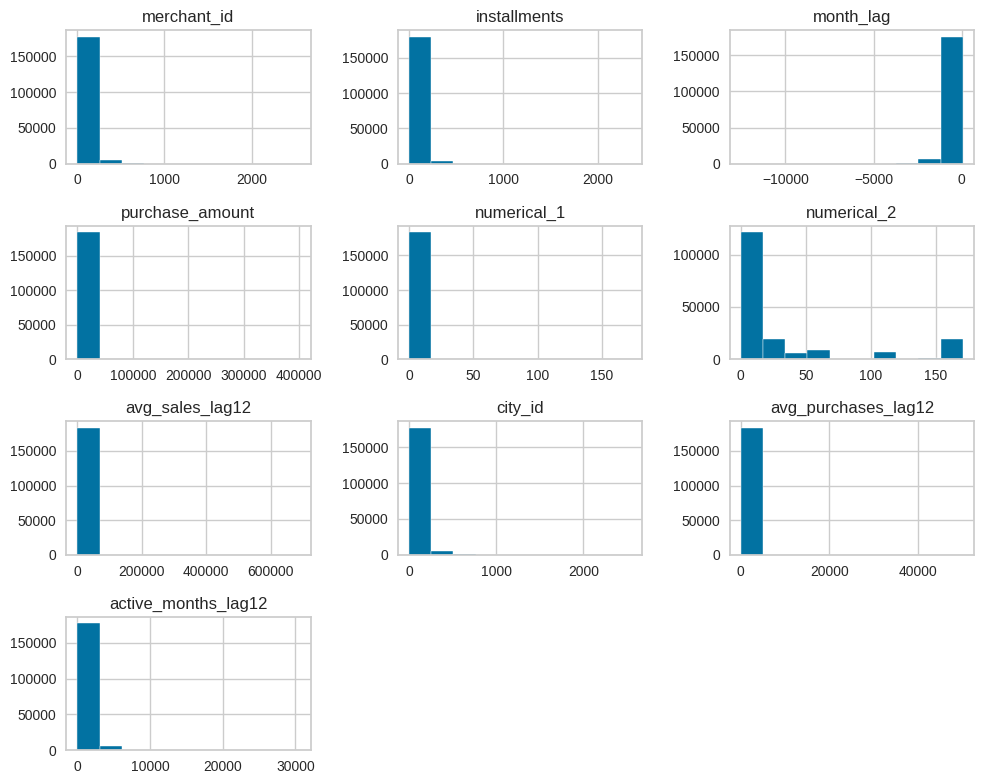

In [19]:
# Visualize distribution of each feature
features.hist(figsize=(10,8))
plt.tight_layout();

**note**

according to the above graph it was observed that the features did not follow the normal distribution and kmeans assumes that the data comes from normal distribution therefore i performed power transformation to make a set of features follow a more normal distribution. 
The idea behind power transformations is to apply a mathematical function to each feature that compresses or stretches the values in a way that makes the distribution more symmetrical and closer to normal.

and according to the below graph it explains the the features follow normal distribution after performin power transformation 

In [22]:
# perform power transformation on the features data
pt = PowerTransformer()
features_pt = pt.fit_transform(features)

# convert the transformed array to a DataFrame
features_pt = pd.DataFrame(features_pt, columns=features.columns)

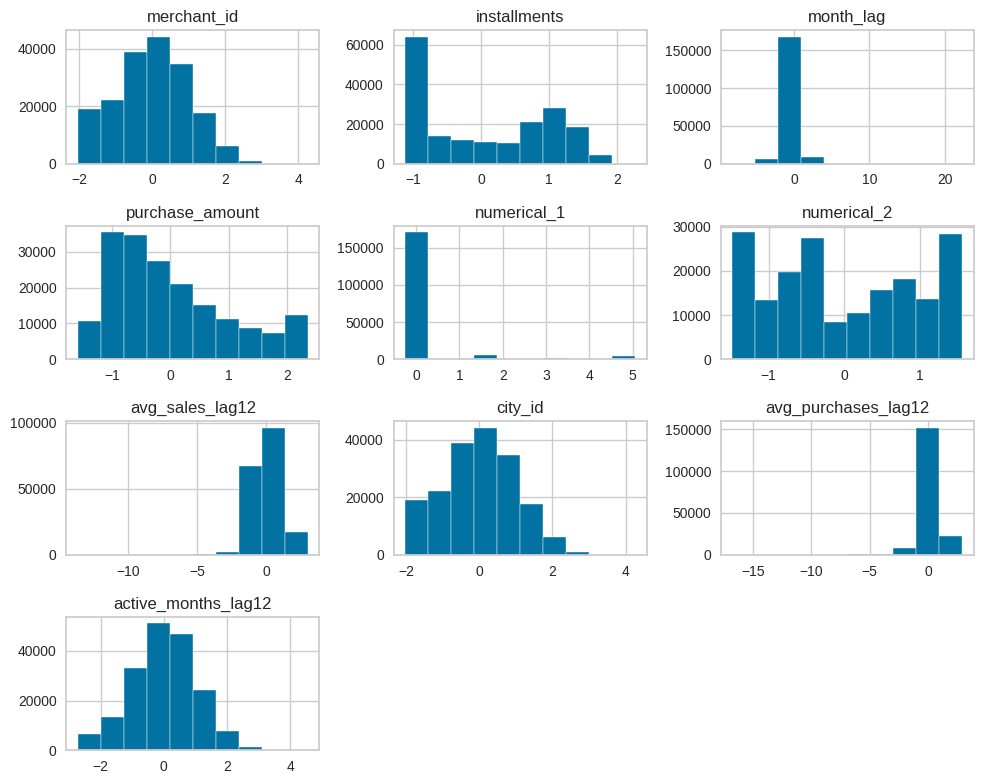

In [23]:
# Visualize distribution of each feature after transformation
features_pt.hist(figsize=(10,8))
plt.tight_layout();

In [24]:
# check the missing values 
features_pt.isna().sum()

merchant_id            0
installments           0
month_lag              0
purchase_amount        0
numerical_1            0
numerical_2            0
avg_sales_lag12        0
city_id                0
avg_purchases_lag12    0
active_months_lag12    0
dtype: int64

In [25]:
# print first five rows 
features_pt.head()

,merchant_id,installments,month_lag,purchase_amount,numerical_1,numerical_2,avg_sales_lag12,city_id,avg_purchases_lag12,active_months_lag12
0,-0.500,0.796,0.370,0.663,-0.256,-0.480,-0.611,-0.500,-0.827,-0.482
1,0.415,-0.648,-0.321,0.789,-0.256,0.494,-0.308,0.415,-0.179,0.407
2,1.067,1.572,-0.422,0.335,-0.256,-0.312,-0.133,1.067,-0.449,1.060
3,0.113,-1.118,-0.088,-1.512,-0.256,-0.926,-0.571,0.113,-0.717,0.111
4,0.444,-1.118,-0.118,-0.578,-0.256,1.424,-0.176,0.444,0.058,0.434


**note**

We should use the StandardScaler transformation before applying the K-means algorithm because K-means is a distance-based algorithm uses the Euclidean distance to compute the similarity between data points. If the features have different scales, then the distances will be dominated by the features with larger scales, and the algorithm may give more importance to those features. By scaling the features to have zero mean and unit variance using the StandardScaler transformation, we ensure that all features contribute equally to the clustering algorithm, and that the distances are not biased by the feature scales.

In [26]:
# feature normalization, you can also try what if not performing this step.
feature_names = list(features_pt.columns)
scaler = StandardScaler()

feat_scaled = pd.DataFrame(scaler.fit_transform(features_pt), columns=feature_names)

feat_scaled.describe()

,merchant_id,installments,month_lag,purchase_amount,numerical_1,numerical_2,avg_sales_lag12,city_id,avg_purchases_lag12,active_months_lag12
count,183756.000,183756.000,183756.000,183756.000,183756.000,183756.000,183756.000,183756.000,183756.000,183756.000
mean,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.030,-1.118,-8.156,-1.583,-0.256,-1.478,-13.682,-2.030,-16.754,-2.726
25%,-0.691,-1.118,-0.450,-0.797,-0.256,-0.808,-0.483,-0.691,-0.488,-0.666
50%,0.025,-0.092,0.205,-0.251,-0.256,-0.170,-0.182,0.025,-0.193,0.025
75%,0.700,0.977,0.624,0.603,-0.256,0.789,0.250,0.700,0.255,0.679
max,4.263,2.265,22.318,2.351,5.061,1.568,3.022,4.263,2.937,4.558


In [27]:
# check the missing values after scaling 
feat_scaled.isna().sum()

merchant_id            0
installments           0
month_lag              0
purchase_amount        0
numerical_1            0
numerical_2            0
avg_sales_lag12        0
city_id                0
avg_purchases_lag12    0
active_months_lag12    0
dtype: int64

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10), k=(2, 11))

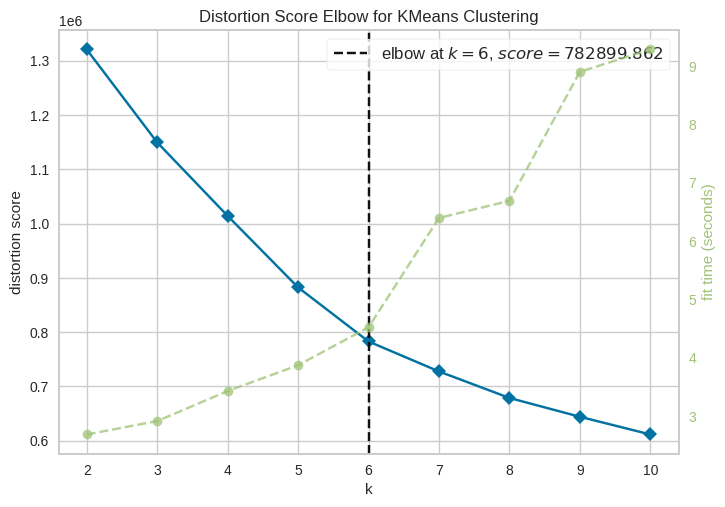

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 11))

visualizer.fit(feat_scaled)   
visualizer.show()

from the above graph it was observed that best k was 6 and the distortion score was 782899.862

In [29]:
# after obtaining the best k i am starting to perfom the pridiction on the feat_scaled data

# assign 6 as a number of clusters
kmeans=KMeans(n_clusters=6)
# perform prediction on the feat_scaled data
pred=kmeans.fit_predict(feat_scaled)
# add the prediction column to the data
feat_scaled['labels'] = pred
# print the number of cluster 
kmeans.n_clusters
# print the number of data points in each cluster 
feat_scaled['labels'].value_counts()

6

labels
1    47579
3    43674
5    38638
4    28451
2    15890
0     9524
Name: count, dtype: int64

In [30]:
# print the first five rows after adding the label column to the data 
feat_scaled.head()

,merchant_id,installments,month_lag,purchase_amount,numerical_1,numerical_2,avg_sales_lag12,city_id,avg_purchases_lag12,active_months_lag12,labels
0,-0.500,0.796,0.370,0.663,-0.256,-0.480,-0.611,-0.500,-0.827,-0.482,1
1,0.415,-0.648,-0.321,0.789,-0.256,0.494,-0.308,0.415,-0.179,0.407,3
2,1.067,1.572,-0.422,0.335,-0.256,-0.312,-0.133,1.067,-0.449,1.060,1
3,0.113,-1.118,-0.088,-1.512,-0.256,-0.926,-0.571,0.113,-0.717,0.111,3
4,0.444,-1.118,-0.118,-0.578,-0.256,1.424,-0.176,0.444,0.058,0.434,3


**note**

it is necessary when we want to plot the plot the clusters generated from high dimension dataframe to reduction the dimensions of this dataframe to plot the graph expressively.

therefore, i used t-SNE (t-distributed stochastic neighbor embedding)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 't-SNE Visualization with Categories')

Text(0.5, 0, 'Dimension 1')

Text(0, 0.5, 'Dimension 2')

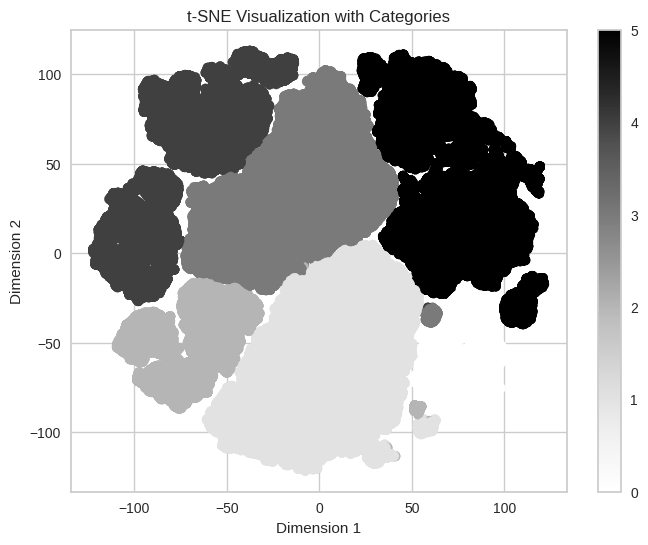

In [32]:
# Apply t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(feat_scaled)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=feat_scaled['labels'])
plt.colorbar()
plt.title('t-SNE Visualization with Categories')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Q_2

according to the below statistics based on the loyality score column before performing the PCAit was observed that: 
- cluster1 and cluster0 had the highest max 
- all the clusters had the same min value 
- cluster1 had the largest size
- cluster0 had the smallest size
- cluster1 had the highest mean
- cluster2 had the lowest mean 

In [44]:
# aggregate the card_id with loyality score by mean
statistics_df = df.groupby(['card_id']).agg({'score': 'mean'})

# add the predictions of the clusters on a datafrqme with score to get some statistics 
statistics_df['labels'] = pred
# print shape of the data frame 
statistics_df.shape
# print first five rows 
statistics_df.head()

(183756, 2)

,score,labels
card_id,,
C_ID_00007093c1,0.134,1
C_ID_0001506ef0,0.884,3
C_ID_000183fdda,-0.264,1
C_ID_00027503e2,0.813,3
C_ID_0002c7c2c1,1.289,3


In [45]:
# print number of data points in each cluster 
statistics_df['labels'].value_counts()
# using describe to print some statistics about each cluster 
(statistics_df.groupby(['labels'])['score']).describe()

labels
1    47579
3    43674
5    38638
4    28451
2    15890
0     9524
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,9524.000,-0.310,4.295,-33.219,-0.861,0.074,1.060,15.011
1,47579.000,-0.514,4.124,-33.219,-0.816,-0.035,0.661,17.676
2,15890.000,-0.532,4.274,-33.219,-0.933,-0.056,0.751,17.965
3,43674.000,-0.338,3.503,-33.219,-1.044,-0.088,0.858,15.295
4,28451.000,-0.393,3.161,-33.219,-0.748,-0.089,0.482,15.171
5,38638.000,-0.265,3.706,-33.219,-0.914,0.016,0.958,12.970


# Q_3

it was observed that the clustering process improved after using dimension reduction method (PCA) and this improvement was reflected on the shape of clusters and and distortion score it was decreased from 782899.862 to 485095.980
this improvement may occured because of some reasons related to dimension reduction such as:
- reduce noise: High-dimensional data often contains noise or irrelevant features that can make it difficult to identify meaningful patterns.
- improve interpretability: Lower-dimensional data is often more interpretable than high-dimensional data, as it can be visualized and analyzed more easily.
- improve scalability: High-dimensional data can be computationally expensive to cluster, especially for algorithms that rely on distance metrics or similarity measures. By reducing the dimensionality of the data, we can reduce the computational complexity of the clustering algorithm and make it more scalable.

In [62]:
# perform a PCA

# determine to the pca to save 80 of the data 
pca = PCA(n_components=.8)
# perform a dimension reduction on the feat_scaled dataframe 
pca.fit(feat_scaled)
pca_transformed = pca.transform(feat_scaled)
# transform the the output data from the pca into a dataframe
pca_transformed = pd.DataFrame(pca_transformed)
# print the shape of the data frame 
pca_transformed.shape

PCA(n_components=0.8)

(183756, 4)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10), k=(2, 11))

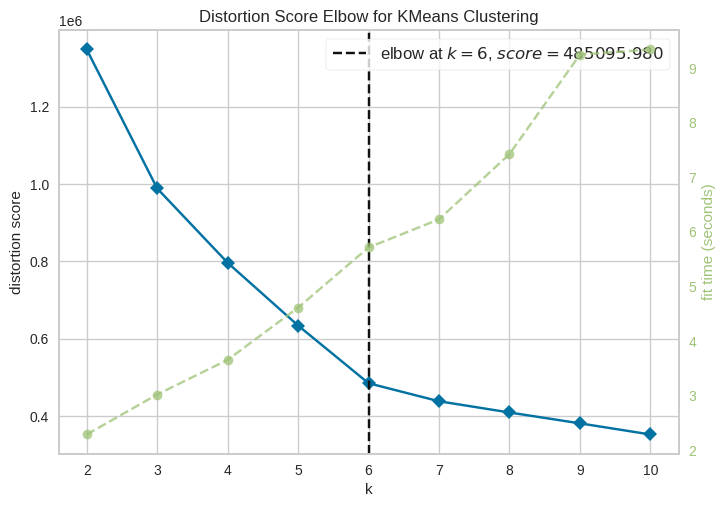

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
# Now, we can perform clustering on the above data after the dimension reduction
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 11))
visualizer.fit(pca_transformed)   
visualizer.show()

from the above graph the value of k still has the same value like befor PCA but the distortion score decreased to 485095.980

In [64]:
# after obtaining the best k i am starting to perfom the pridiction on the feat_scaled data

# assign 6 as a number of clusters
kmeans=KMeans(n_clusters=6)
# perform prediction on the feat_scaled data
pred_pca=kmeans.fit_predict(pca_transformed)
# assign the predicted classes into the pca_transformed
pca_transformed['labels'] = pred_pca
# print number of classes
kmeans.n_clusters
# print number of data points in each class
pca_transformed['labels'].value_counts()

6

labels
3    47660
0    43304
1    38639
2    28811
5    15902
4     9440
Name: count, dtype: int64

In [65]:
# convert features type into strings to match the requirments of t-SNE (t-distributed stochastic neighbor embedding)
pca_transformed.columns = pca_transformed.columns.astype(str)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 't-SNE Visualization with Categories')

Text(0.5, 0, 'Dimension 1')

Text(0, 0.5, 'Dimension 2')

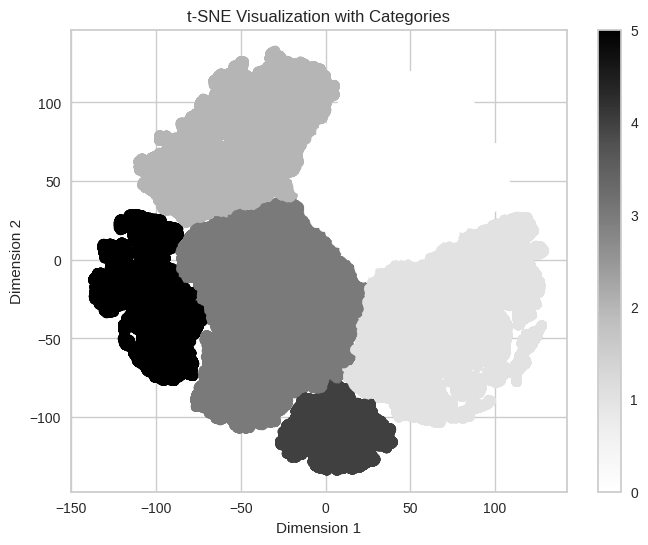

In [67]:
#reduce the dimensions of the dataframe which is generated by PCA into 2 dimension to facilitate the plotting of the clusters shape 
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(pca_transformed)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pca_transformed['labels'])
plt.colorbar()
plt.title('t-SNE Visualization with Categories')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Q_4
according to the below statistics based on the loyality score column after performing the PCA it was observed that:

- cluster3 and cluster5 had the highest max
- the min values for all clusters changed unlike the previos statistics befor the dimension reduction
- cluster0 had the largest size
- cluster4 had the smallest size
- cluster1 had the highest mean
- cluster5 had the lowest mean

In [69]:
# aggregate the card_id with the loyality score by the mean 
statistics_df_pca = df.groupby(['card_id']).agg({'score': 'mean'})

# add the predication of the clusters with the loyality score in a dataframe 
statistics_df_pca['labels'] = pred_pca
# print the shape of the dataframe 
statistics_df_pca.shape
# print the first five rows 
statistics_df_pca.head()

(183756, 2)

,score,labels
card_id,,
C_ID_00007093c1,0.134,3
C_ID_0001506ef0,0.884,0
C_ID_000183fdda,-0.264,3
C_ID_00027503e2,0.813,0
C_ID_0002c7c2c1,1.289,0


In [70]:
# print the number of data points in each cluster 
statistics_df_pca['labels'].value_counts()
# using describe to print some statistics about each cluster 
(statistics_df_pca.groupby(['labels'])['score']).describe()

labels
3    47660
0    43304
1    38639
2    28811
5    15902
4     9440
Name: count, dtype: int64

,count,mean,std,min,25%,50%,75%,max
labels,,,,,,,,
0,43304.000,-0.335,3.505,-33.219,-1.044,-0.086,0.865,15.295
1,38639.000,-0.265,3.706,-33.219,-0.914,0.016,0.958,12.970
2,28811.000,-0.397,3.163,-33.219,-0.751,-0.091,0.480,15.171
3,47660.000,-0.514,4.127,-33.219,-0.817,-0.035,0.662,17.676
4,9440.000,-0.307,4.284,-33.219,-0.859,0.073,1.055,15.011
5,15902.000,-0.533,4.273,-33.219,-0.933,-0.057,0.751,17.965


# Q_5

it was observed that (Y) in an authorized_flag high frequent co-occurring transaction types with (12) in the active_months_lag12 they co-occur with each other by more than 90 percent 

regarding the support threshold i tried multipul trials to find the best ratio i was starting from .1 to .9 and .9 was the best value because it appeared the highest frequent co-occuring transaction.

In [71]:
# print the shape of the main dataframe 
df.shape

(11292220, 34)

In [19]:
# check the data type of each column to take a look on the categorical columns which will be suitable for apriori algorithm 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11292220 entries, 0 to 12563651
Data columns (total 34 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              object 
 1   card_id                      object 
 2   city_id                      int64  
 3   category_1                   object 
 4   installments                 int64  
 5   category_3                   object 
 6   merchant_category_id         int64  
 7   merchant_id                  object 
 8   month_lag                    int64  
 9   purchase_amount              float64
 10  purchase_date                object 
 11  category_2                   float64
 12  state_id                     int64  
 13  subsector_id                 int64  
 14  merchant_group_id            int64  
 15  numerical_1                  float64
 16  numerical_2                  float64
 17  most_recent_sales_range      object 
 18  most_recent_purchases_range  object 
 19  avg

In [30]:
# convert some columns into categorical columns 
df['category_2']=df['category_2'].astype('category')
df['active_months_lag12']=df['active_months_lag12'].astype('category')
df['feature_1']=df['feature_1'].astype('category')
df['feature_2']=df['feature_2'].astype('category')
df['feature_3']=df['feature_3'].astype('category')

In [34]:
# add active_months_lag12 and authorized_flag into a category dataframe to pass it to the model 
cat_df = df[['active_months_lag12','authorized_flag']]

In [35]:
# print the first five rows at the cat_df 
cat_df.head()

,active_months_lag12,authorized_flag
0,12,Y
1,12,Y
2,12,Y
3,12,Y
4,12,Y


In [40]:
# encode the categorical data frame to pass it to apriori algorithm
X = pd.get_dummies(cat_df)
# specify .9 to the support which will extract the pattern mining between the two features 
frequent_itemsets = apriori(X, min_support=0.9, use_colnames=True)
print(frequent_itemsets)

   support                                     itemsets
0    0.979                     (active_months_lag12_12)
1    0.937                          (authorized_flag_Y)
2    0.917  (authorized_flag_Y, active_months_lag12_12)


# Q_6

after splitting the dataframe the it was finding that the ratio of frequent co-occurring transaction of the pattern mining with the same support ratio is equal which is good.

In [44]:
# calculate the mean of the 'score' column
score_mean = df['score'].mean()

# split the DataFrame horizontally into 2 dataframes based on the mean of the 'score' column
df_above_mean = df[df['score'] >= score_mean]
df_below_mean = df[df['score'] < score_mean]

In [51]:
# print the dimensions of the first dataframe
df_above_mean.shape

(7159736, 34)

In [55]:
# select the the same category features used in the first trial 
cat_df_above_mean = df_above_mean[['active_months_lag12','authorized_flag']]

In [56]:
# encode the categorical dataframe to pass it to apriori algorithm 
X_above = pd.get_dummies(cat_df_above_mean)
# specify .9 to the support which will extract the pattern mining between the two features
frequent_itemsets_above = apriori(X_above, min_support=0.9, use_colnames=True)
print(frequent_itemsets_above)

   support                                     itemsets
0    0.979                     (active_months_lag12_12)
1    0.937                          (authorized_flag_Y)
2    0.917  (authorized_flag_Y, active_months_lag12_12)


In [52]:
# print the first five rows for the other data fram 
df_below_mean.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,...,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,first_active_month,feature_1,feature_2,feature_3,score
31,Y,C_ID_55aa6d6d5e,88,N,0,A,80,M_ID_e020e9b302,-9,-0.702,...,6,1.190,1.157,12,Y,Jul-16,3,3,1,-1.798
32,Y,C_ID_55aa6d6d5e,88,N,0,A,80,M_ID_e020e9b302,-9,-0.702,...,6,1.190,1.157,12,Y,Jul-16,3,3,1,-1.798
33,Y,C_ID_55aa6d6d5e,88,N,0,A,80,M_ID_e020e9b302,-11,-0.723,...,6,1.190,1.157,12,Y,Jul-16,3,3,1,-1.798
34,Y,C_ID_55aa6d6d5e,88,N,0,A,80,M_ID_e020e9b302,-2,-0.706,...,6,1.190,1.157,12,Y,Jul-16,3,3,1,-1.798
35,N,C_ID_55aa6d6d5e,88,N,0,A,80,M_ID_e020e9b302,-5,-0.711,...,6,1.190,1.157,12,Y,Jul-16,3,3,1,-1.798


In [57]:
# select the the same category features used in the first trial
cat_df_below_mean = df_below_mean[['active_months_lag12','authorized_flag']]

In [58]:
# encode the categorical dataframe to pass it to apriori algorithm
X_below = pd.get_dummies(cat_df_above_mean)
# specify .9 to the support which will extract the pattern mining between the two features
frequent_itemsets_below = apriori(X_below, min_support=0.1, use_colnames=True)
print(frequent_itemsets_below)

   support                                     itemsets
0    0.979                     (active_months_lag12_12)
1    0.937                          (authorized_flag_Y)
2    0.917  (authorized_flag_Y, active_months_lag12_12)
